OperationalError: no such table: my_table

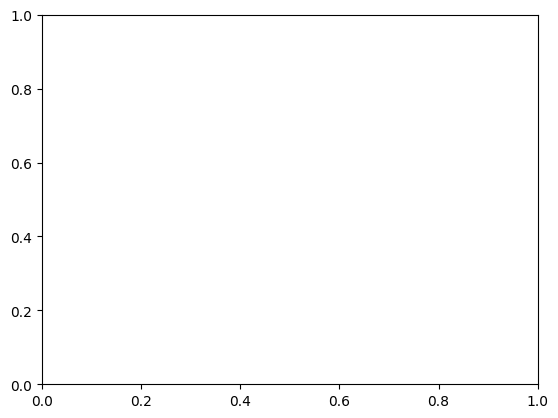

In [7]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import time

# Constants for the Ishigami function
a = 7.0
b = 0.1

def ishigami(x1, x2, x3):
    """Evaluate the Ishigami function."""
    return np.sin(x1) + a * np.sin(x2)**2 + b * x3**4 * np.sin(x1)

def fetch_data(database_path):
    """Fetch x1, x2, x3 data from the SQLite database."""
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()
    cursor.execute("SELECT x1, x2, x3 FROM my_table")
    data = cursor.fetchall()
    conn.close()
    return data

def plot_ishigami_output(database_path):
    """Dynamically plot the Ishigami function output based on database updates."""
    plt.ion()  # Turn on interactive mode for plotting
    fig, ax = plt.subplots()
    
    # Initial empty lists for data and Ishigami output
    data = []
    ishigami_values = []

    while True:
        # Fetch new data
        new_data = fetch_data(database_path)
        
        # If new data has been added to the database
        if len(new_data) > len(data):
            data = new_data
            ishigami_values = [ishigami(x1, x2, x3) for x1, x2, x3 in data]
            
            ax.clear()
            ax.plot(ishigami_values, '-o')
            ax.set_title('Ishigami Function Output')
            ax.set_xlabel('Data Points')
            ax.set_ylabel('Function Value')
            plt.draw()

        time.sleep(2)  # Pause for 2 seconds before checking for new data

if __name__ == "__main__":
    database_path = "db/my_database.db"  # Change this to your actual path
    plot_ishigami_output(database_path)


In [6]:
import sqlite3
import numpy as np
import time

DB_PATH = "/db/my_database.db"  # path to SQLite database inside the Docker container

def insert_data(conn, x1, x2, x3):
    cursor = conn.cursor()
    cursor.execute("INSERT INTO my_table (x1, x2, x3) VALUES (?, ?, ?)", (x1, x2, x3))
    conn.commit()

def main():
    conn = sqlite3.connect(DB_PATH)
    while True:
        x1 = np.random.uniform(-np.pi, np.pi)
        x2 = np.random.uniform(-np.pi, np.pi)
        x3 = np.random.uniform(-np.pi, np.pi)
        
        insert_data(conn, x1, x2, x3)
        
        print(f"Inserted data: x1={x1}, x2={x2}, x3={x3}")  # Just to log the action
        time.sleep(30)

if __name__ == "__main__":
    main()

-0.4359616002567601 -2.3795939331920266 0.3454493802117886
2.1650405082099917 -2.8781851370796327 -1.237865112253847
-0.10477095102258849 2.11976509314567 -0.9947573854730791
2.5528844537899387 -2.7171587710262504 0.027549311166746637
1.7707220132801247 1.5056442248201876 -1.5919316161667536
0.8934170975168625 1.4875612211710783 -0.31608951278900443


KeyboardInterrupt: 

In [ ]:
import subprocess

# Constants
DOCKER_IMAGE_NAME = 'simple-db-app'
DOCKER_CONTAINER_NAME = 'simple-db-container'
DOCKERFILE_CONTENT = """
FROM python:3.9-slim

RUN apt-get update && apt-get install -y sqlite3

# Add this line to install numpy
RUN pip install numpy

WORKDIR /app
COPY populate_db.py .
CMD ["python", "./populate_db.py"]
"""

POPULATE_DB_SCRIPT = """
import sqlite3
import time
import numpy as np

DATABASE_NAME = 'simple_db.db'

def create_database():
    conn = sqlite3.connect(DATABASE_NAME)
    cursor = conn.cursor()
    
    cursor.execute('''CREATE TABLE IF NOT EXISTS data (x1 REAL, x2 REAL, x3 REAL)''')
    conn.commit()
    conn.close()

def insert_data(x1, x2, x3):
    conn = sqlite3.connect(DATABASE_NAME)
    cursor = conn.cursor()
    
    cursor.execute("INSERT INTO data (x1, x2, x3) VALUES (?, ?, ?)", (x1, x2, x3))
    conn.commit()
    conn.close()

def generate_random_data():
    lower_bound = -np.pi
    upper_bound = np.pi
    
    x1 = np.random.uniform(lower_bound, upper_bound)
    x2 = np.random.uniform(lower_bound, upper_bound)
    x3 = np.random.uniform(lower_bound, upper_bound)

    return x1, x2, x3

if __name__ == "__main__":
    create_database()

    while True:
        x1, x2, x3 = generate_random_data()
        insert_data(x1, x2, x3)
        time.sleep(30)
"""

def create_files():
    with open("Dockerfile", "w") as f:
        f.write(DOCKERFILE_CONTENT)

    with open("populate_db.py", "w") as f:
        f.write(POPULATE_DB_SCRIPT)


def build_docker_image():
    cmd = f"docker build -t {DOCKER_IMAGE_NAME} ."
    subprocess.run(cmd, shell=True, check=True)


def remove_existing_container():
    cmd = f"docker rm -f {DOCKER_CONTAINER_NAME}"
    subprocess.run(cmd, shell=True, check=False)  # check=False to ignore errors if the container does not exist


def run_container():
    cmd = f"docker run --name {DOCKER_CONTAINER_NAME} {DOCKER_IMAGE_NAME}"
    subprocess.run(cmd, shell=True, check=True)


if __name__ == "__main__":
    # 1. Create the necessary Dockerfile and script
    create_files()

    # 2. Build the Docker image
    build_docker_image()

    # 3. Remove any existing container
    remove_existing_container()

    # 4. Run the new Docker container
    run_container()

In [ ]:
import subprocess

# Constants
DOCKER_IMAGE_NAME = 'simple-db-app'
DOCKER_CONTAINER_NAME = 'simple-db-container'
DOCKERFILE_CONTENT = """
FROM python:3.9-slim

RUN apt-get update && apt-get install -y sqlite3

# Add this line to install numpy
RUN pip install numpy

WORKDIR /app
COPY populate_db.py .
CMD ["python", "./populate_db.py"]
"""

POPULATE_DB_SCRIPT = """
import sqlite3
import time
import numpy as np

DATABASE_NAME = 'simple_db.db'

def create_database():
    conn = sqlite3.connect(DATABASE_NAME)
    cursor = conn.cursor()
    
    cursor.execute('''CREATE TABLE IF NOT EXISTS data (x1 REAL, x2 REAL, x3 REAL)''')
    conn.commit()
    conn.close()

def insert_data(x1, x2, x3):
    conn = sqlite3.connect(DATABASE_NAME)
    cursor = conn.cursor()
    
    cursor.execute("INSERT INTO data (x1, x2, x3) VALUES (?, ?, ?)", (x1, x2, x3))
    conn.commit()
    conn.close()

def generate_random_data():
    lower_bound = -np.pi
    upper_bound = np.pi
    
    x1 = np.random.uniform(lower_bound, upper_bound)
    x2 = np.random.uniform(lower_bound, upper_bound)
    x3 = np.random.uniform(lower_bound, upper_bound)

    return x1, x2, x3

if __name__ == "__main__":
    create_database()

    while True:
        x1, x2, x3 = generate_random_data()
        insert_data(x1, x2, x3)
        time.sleep(30)
"""

def create_files():
    with open("Dockerfile", "w") as f:
        f.write(DOCKERFILE_CONTENT)

    with open("populate_db.py", "w") as f:
        f.write(POPULATE_DB_SCRIPT)


def build_docker_image():
    cmd = f"docker build -t {DOCKER_IMAGE_NAME} ."
    subprocess.run(cmd, shell=True, check=True)


def remove_existing_container():
    cmd = f"docker rm -f {DOCKER_CONTAINER_NAME}"
    subprocess.run(cmd, shell=True, check=False)  # check=False to ignore errors if the container does not exist


def run_container():
    cmd = f"docker run --name {DOCKER_CONTAINER_NAME} {DOCKER_IMAGE_NAME}"
    subprocess.run(cmd, shell=True, check=True)


if __name__ == "__main__":
    # 1. Create the necessary Dockerfile and script
    create_files()

    # 2. Build the Docker image
    build_docker_image()

    # 3. Remove any existing container
    remove_existing_container()

    # 4. Run the new Docker container
    run_container()